In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 2. Ecuaciones no lineales

## Graficación

Para graficar una función $f:\mathbb{R} \to \mathbb{R}$ en un intervalo $[a, b]$
tomamos una sucesión de $n + 1$ puntos uniformemente distanciados:
$$a = x_0, x_0 + h, x_0 + 2\,h + x_0 + 3\,h, \ldots, x_0 + n\,h = b$$

`linspace(a, b, n)` de numpy genera esta lista de $n$ puntos en el intervalo $[a, b]$ a una distancia $h = \frac{b - a}{n - 1}$:

In [20]:
x = np.linspace(1, 2, 11)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [21]:
x[8]

1.8

In [22]:
y = x**2 - 2
y

array([-1.  , -0.79, -0.56, -0.31, -0.04,  0.25,  0.56,  0.89,  1.24,
        1.61,  2.  ])

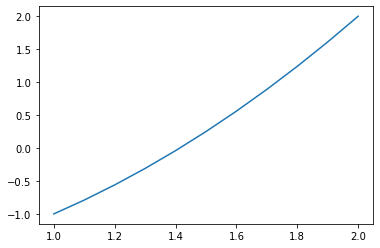

In [23]:
plt.plot(x, y)

## Método de la bisección y variantes
**Definción** Un *corchete* $[a, b]$ para una función $f:\mathbb{R} \to \mathbb{R}$ es un intervalo tal que $f(a)\,f(b) < 0$.

**Ejemplo** $[1, 2]$ es un corchete de $f(x) = x^2 - 2$, puesto que $f(1) = -1$ y $f(2) = 2$.

In [7]:
def f(x):
    return x**2 - 2

In [12]:
(a, b) = (1, 2)
eps = 10**-4
renglones = []
while b - a > eps:
    m = (a + b)/2
    renglones.append((a, b, m, f(m)))
    if f(a) * f(m) < 0:
        b = m
    else:
        a = m

In [13]:
pd.DataFrame.from_records(renglones, columns=["a", "b", "m", "f(m)"])

,a,b,m,f(m)
0,1.000000,2.000000,1.500000,0.250000
1,1.000000,1.500000,1.250000,-0.437500
2,1.250000,1.500000,1.375000,-0.109375
3,1.375000,1.500000,1.437500,0.066406
4,1.375000,1.437500,1.406250,-0.022461
5,1.406250,1.437500,1.421875,0.021729
6,1.406250,1.421875,1.414062,-0.000427
7,1.414062,1.421875,1.417969,0.010635
8,1.414062,1.417969,1.416016,0.005100
9,1.414062,1.416016,1.415039,0.002336


In [18]:
def biseccion(f, a, b, ε):
    while b - a > ε:
        m = (a + b)/2
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return (a + b)/2

In [17]:
import math
def g(x):
    return math.cos(x) - x

g

<function __main__.g(x)>

In [16]:
biseccion(g, 0, 1, 10**-4)

0.739105224609375

In [19]:
(a, b, ε) = (1, 2, 10**-4)
renglones = []
while b - a > ε:
    m = a - f(a)*(b - a)/(f(b) - f(a))
    renglones.append((a, b, m, f(m)))
    if f(a) * f(m) < 0:
        b = m
    else:
        a = m
pd.DataFrame.from_records(renglones, columns=["a", "b", "m", "f(m)"])

,a,b,m,f(m)
0,1.000000,2,1.333333,-2.222222e-01
1,1.333333,2,1.400000,-4.000000e-02
2,1.400000,2,1.411765,-6.920415e-03
3,1.411765,2,1.413793,-1.189061e-03
4,1.413793,2,1.414141,-2.040608e-04
5,1.414141,2,1.414201,-3.501278e-05
6,1.414201,2,1.414211,-6.007287e-06
7,1.414211,2,1.414213,-1.030689e-06
8,1.414213,2,1.414213,-1.768383e-07
9,1.414213,2,1.414214,-3.034065e-08


In [24]:
def regula_falsi(f, a, b, ε):
    while b - a > eps:
        m = a - f(a)*(b - a)/(f(b) - f(a))
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return (a + b)/2

In [25]:
regula_falsi(f, 1, 2, 10**-4)

1.414213562373095